# Mid-semester assignment - Regression
Hello dear students,<br> This is the template notebook. Please click on the "File" tab and then on "Save a copy into drive".

---
<br>

### Name and ID:
Student 1: Oz Gemer &nbsp;&nbsp; 208426460
<br>
Student 2: Ofir Gur Cohen &nbsp;&nbsp; ---------

### Goodluck!

## Installs and Download the data

In [1]:
%%capture
!pip install shap
!gdown --id 17mCTI5MWJEldCzI5XMMdA56k-z2IK2op
!unzip /content/data.zip

## Imports
Yes... you don't need to ask for permission... you can add more imports.
This also applies to other text and code cells.

In [2]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## Data dictionary
❗❗❗❗ The data dictionary is for you. to explain to you about the different features. It should not be used during the implementation of the assignment!❗❗❗❗

In [3]:
data_dict = pd.read_excel('/content/data_dictionary.xlsx')
data_dict.head(26)

,Feature Name,Data Type,Explanation
0,Car_ID,Interger,Unique id of each observation (Interger)
1,Symboling,Categorical,"Its assigned insurance risk rating, A value of..."
2,carCompany,Categorical,Name of car company (Categorical)
3,fueltype,Categorical,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Categorical,Aspiration used in a car (Categorical)
5,doornumber,Categorical,Number of doors in a car (Categorical)
6,carbody,Categorical,body of car (Categorical)
7,drivewheel,Categorical,type of drive wheel (Categorical)
8,enginelocation,Categorical,Location of car engine (Categorical)
9,wheelbase,Numeric,Weelbase of car (Numeric)


## Dataset
This is the data set you will use in the assignment ✅

In [4]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450.0


In [5]:
def get_col_type(col):
  for i in data_dict.index:
    if data_dict['Feature Name'][i] == col:
      return data_dict['Data Type'][i]

##Pre-Processing

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print(df[col].describe())
  print('\n')

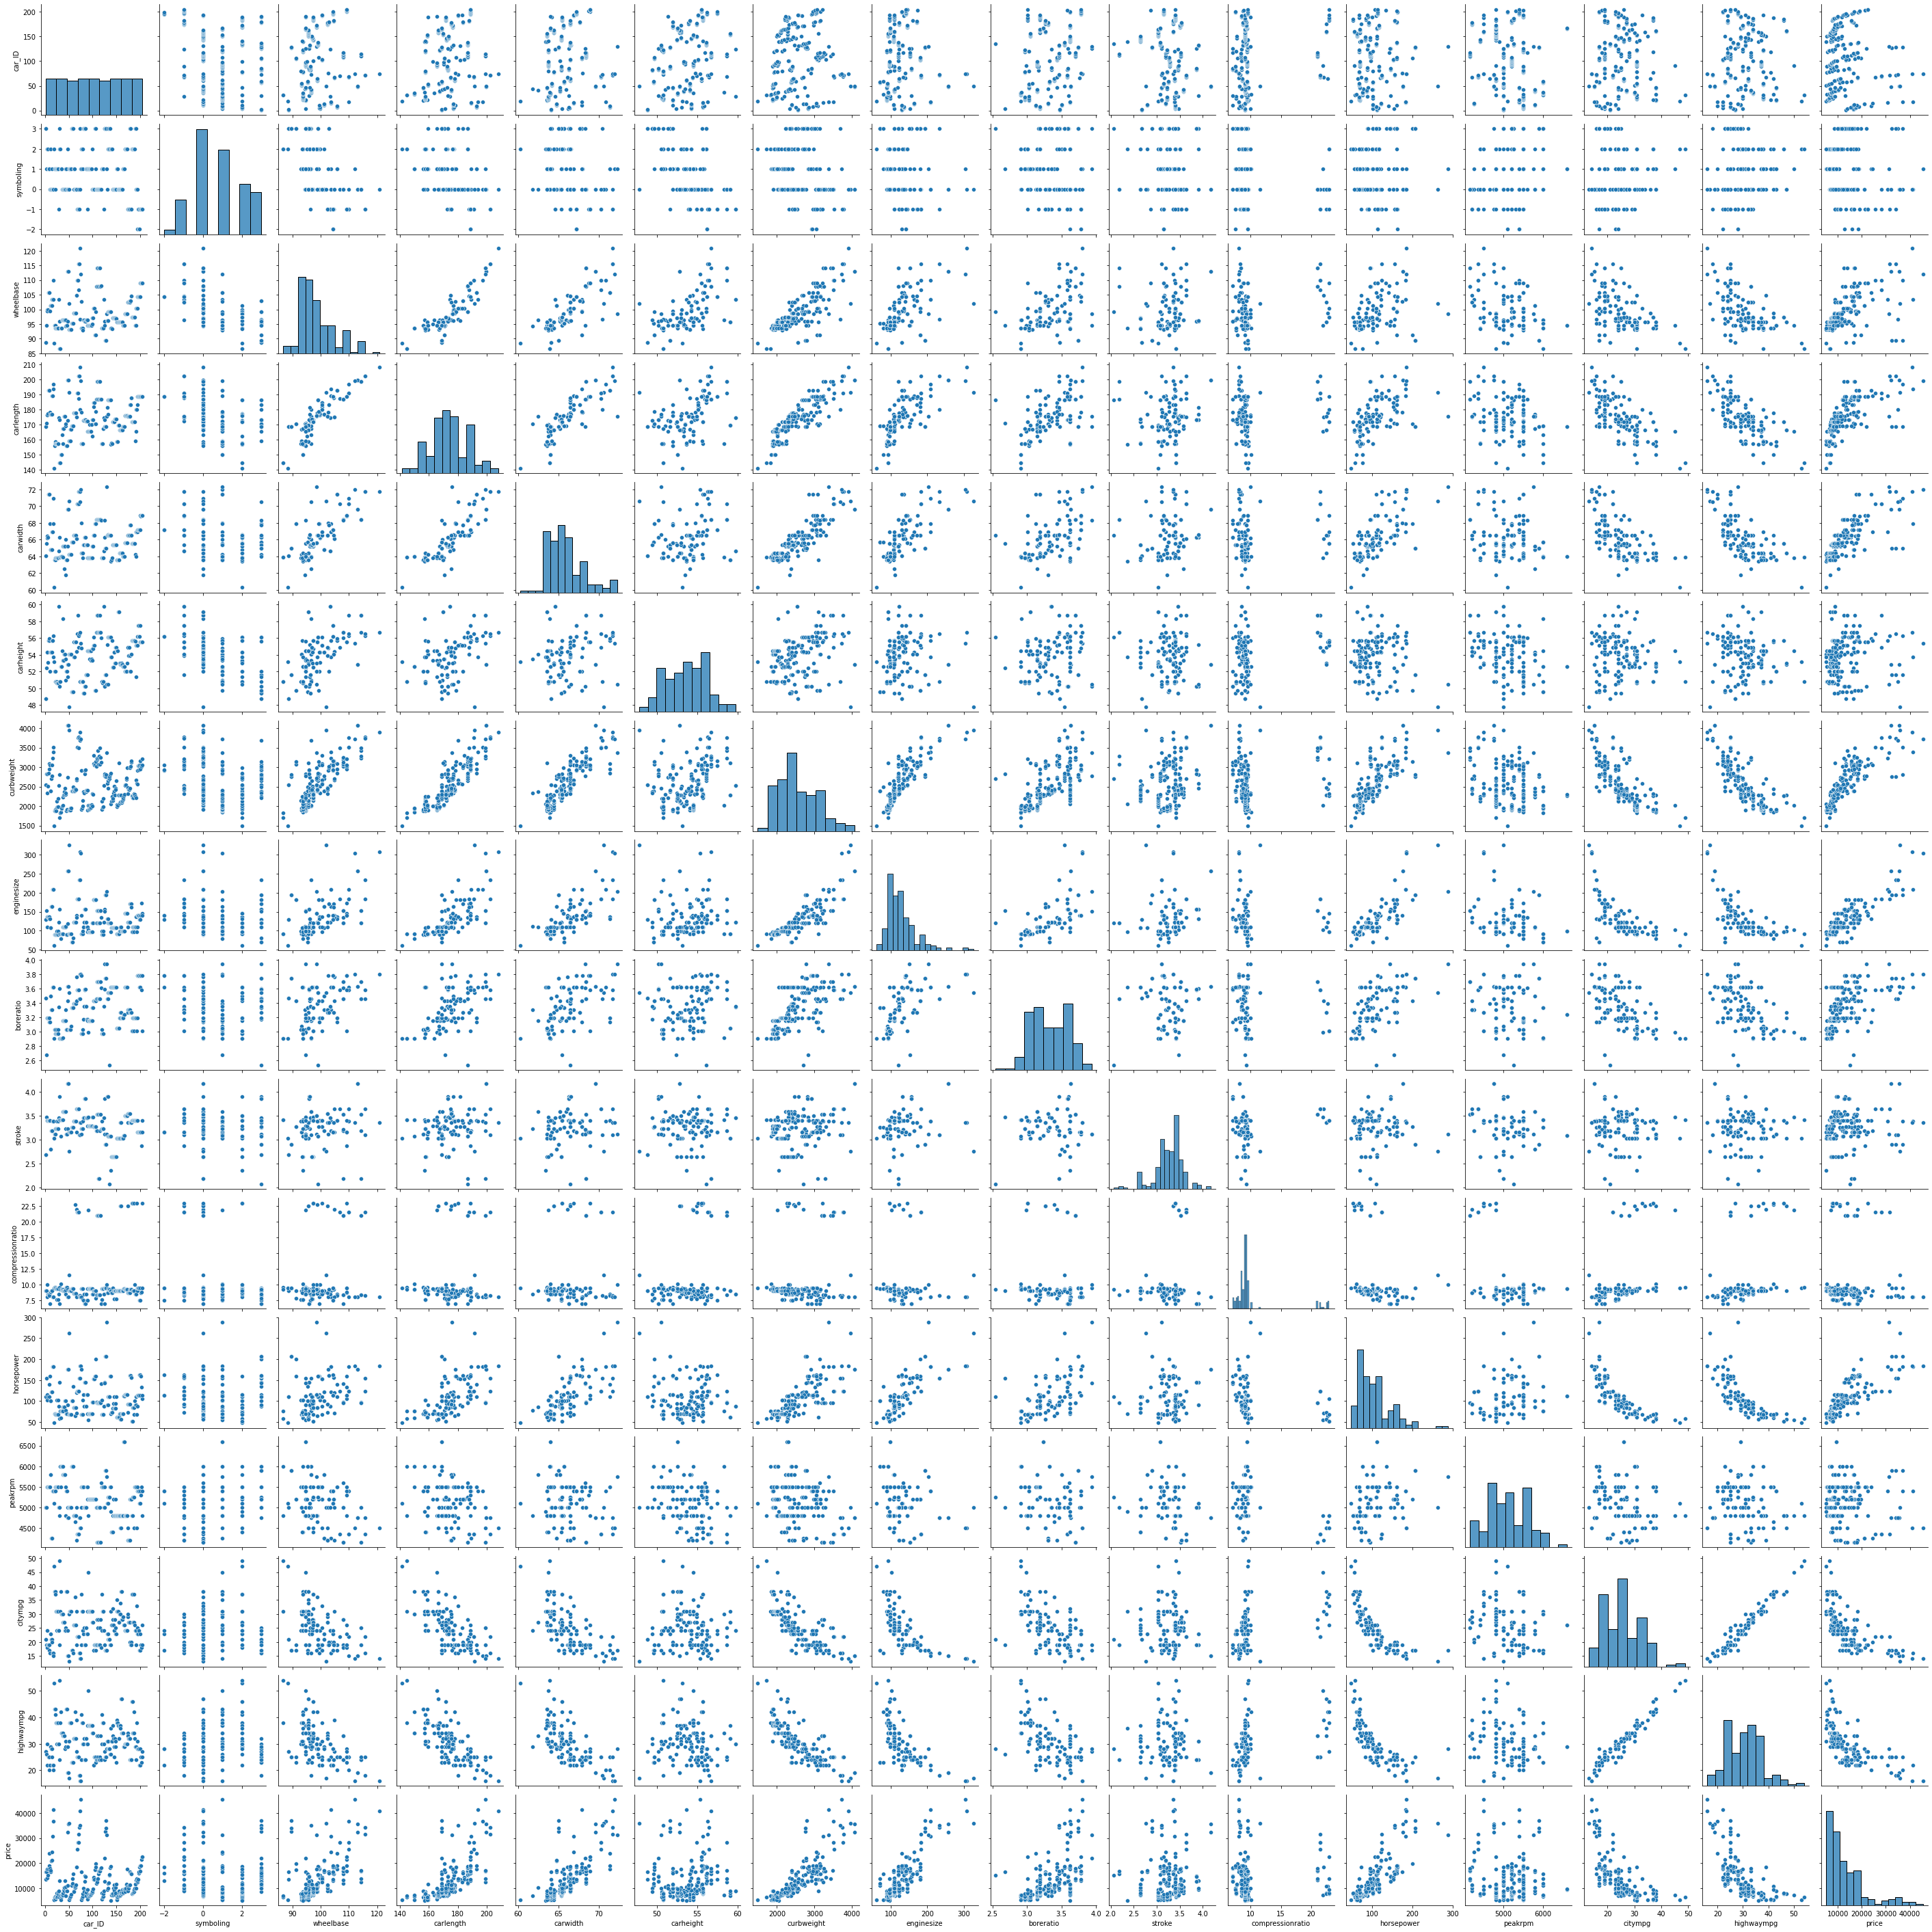

In [7]:
sns.pairplot(df)

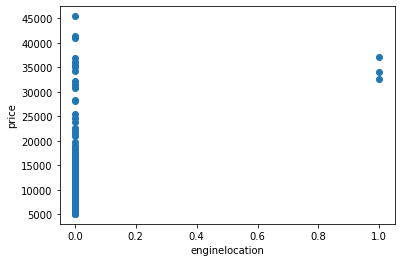

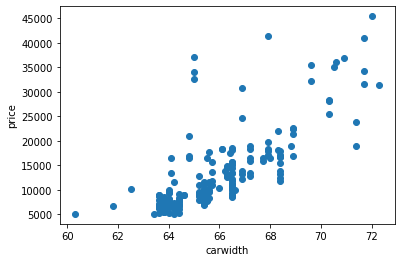

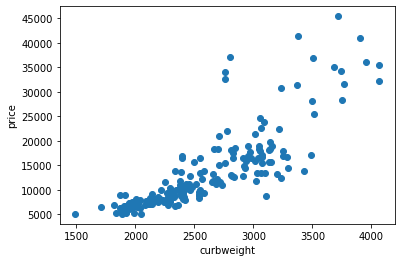

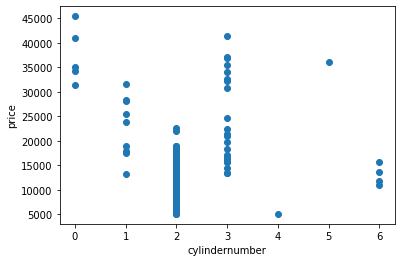

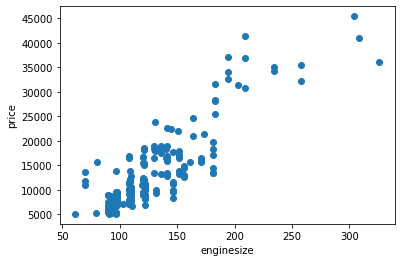

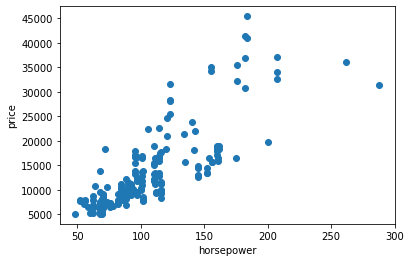

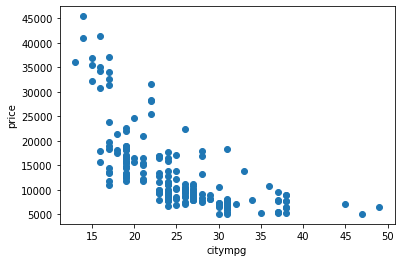

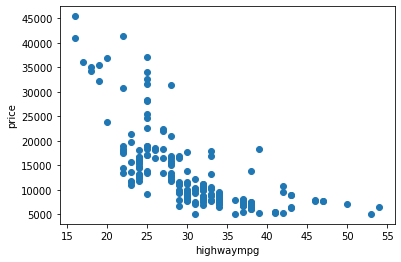

<Figure size 432x288 with 0 Axes>

In [55]:
for col in df.columns:
  if col != 'price':
    plt.scatter(df[col], df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()
    plt.cla()
    plt.clf()

Cleaning & Filtering the data

In [9]:
df = df.dropna()

In [10]:
df = df.drop(columns = ['car_ID', 'CarName', 'fueltype', 'compressionratio', 'enginetype', 'peakrpm', 'stroke', 'carbody', 'doornumber', 'drivewheel', 'fuelsystem', 'symboling', 'boreratio', 'carlength', 'aspiration', 'carheight', 'wheelbase'])

Label Categorizing w/ LabelEncoder

In [11]:
labelencoder = LabelEncoder()

for col in df.columns:
  labels = tuple(df[col].unique())
  if type(df[col].unique()[0]) == str:
    df[col] = labelencoder.fit_transform(df[col])

Normalizing The Data

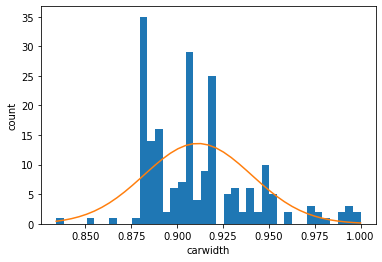

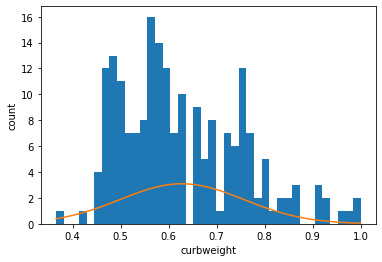

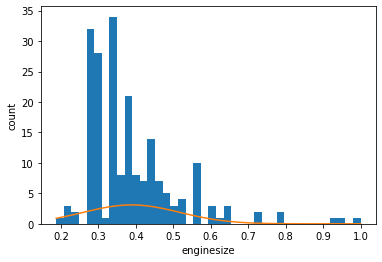

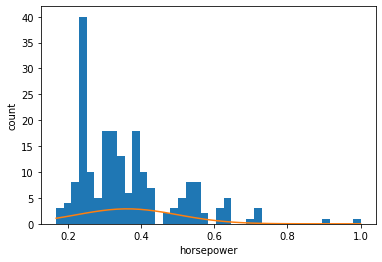

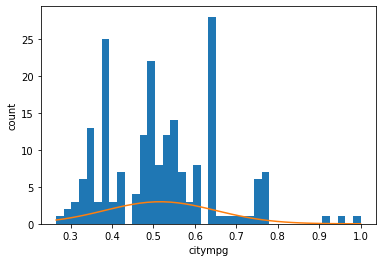

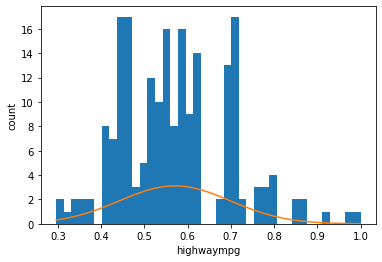

<Figure size 432x288 with 0 Axes>

In [47]:
df_copy = df.copy()

for col in df.columns:
  if get_col_type(col) in ['Numeric',' Integer']:
    df_copy[col] = df_copy[col] / df_copy[col].abs().max()
  
for col in df_copy.columns:
  if get_col_type(col) in ['Numeric',' Integer']:
    params = df_copy[col].describe()
    mu, sigma = params['mean'], params['std']
    count, bins, ignored = plt.hist(df_copy[col], 40)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)))
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    plt.cla()
    plt.clf()

Splitting the data frame to train & test sets

In [50]:
# df split
args_df, result_df = df.drop(columns='price'), df['price']
x_train, x_test, y_train, y_test =  train_test_split(args_df, result_df, test_size=0.35, random_state=42)
# normalized df split
args_df_n, result_df_n = df_copy.drop(columns='price'), df_copy['price']
x_train_n, x_test_n, y_train_n, y_test_n =  train_test_split(args_df_n, result_df_n, test_size=0.35, random_state=42)

<h2>Training<h2>

In [51]:
price = y_train
features = x_train

regr = linear_model.LinearRegression()
regr.fit(features.values,price)

svr = SVR(kernel="linear", gamma="auto", C=100).fit(x_train_n.values, y_train_n)

random_reg = RandomForestRegressor(max_depth=3, random_state=0)
random_reg.fit(features.values, price)

RandomForestRegressor(max_depth=3, random_state=0)

<h3>Linear Regression</h3>

In [52]:
y_liner_reg = regr.predict(x_test.values)
r2_score(y_test, y_liner_reg)

0.8623274384420591

<h3>SVR - Support Vector Regression</h3>

In [53]:
y_SVR_reg = svr.predict(x_test_n.values)
r2_score(y_test_n, y_SVR_reg)

0.059524717895354184

<h3>RVR - Random Vector Regression</h3>

In [54]:
y_RFR_reg = random_reg.predict(x_test.values)
r2_score(y_test, y_RFR_reg)

0.9101398880522945

<h2>Analyzing the model and the results</h2>

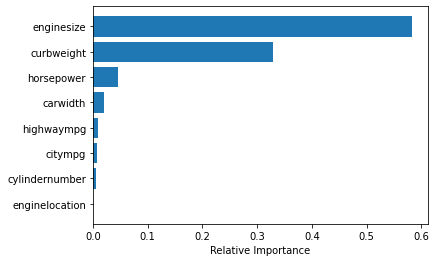

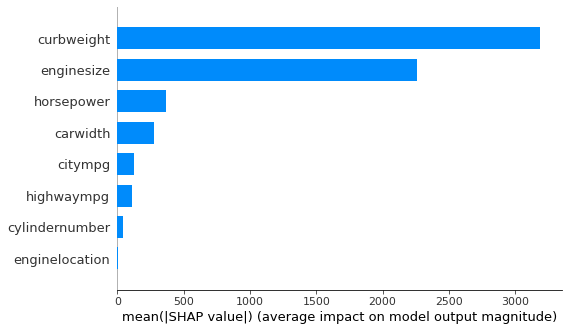

In [46]:
shap.initjs()
importances = random_reg.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
print('\n')
shap.summary_plot(shap.TreeExplainer(random_reg).shap_values(x_train), x_train, feature_names=features, plot_type="bar")

<h1>Conclusions</h1>

After analyzing the data, we found that certain features were not relevant  to the model and decided to exclude them. Our analysis of the model revealed that some of the features that had the most impact on the results were intuitive and we anticipated this outcome during the initial data exploration phase (pre-processing phase).

Features that have a lot of effect on the model's prediction:

1. enginesize
2. horsepower
4. curbweight

<b>explanation:</b>
<br>
<u>1,2:</u>
<i>Engine size & horsepower</i> are one of the most known and relevant features when it comes to cars, they both have a huge impact on the car engine - which is a main component in cars.
Bigger engine size/horsepower => better engine => more expensive car.
<br>
<u>3:</u>
<i>curbweight</i> was a feature we didn't fully understand / discussed. we were suprised that it was one of the top features that effect the model.